## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi


Sun Dec 10 12:44:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.29                 Driver Version: 531.29       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   48C    P8                4W /  N/A|    367MiB /  4096MiB |     19%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [7]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.11.3 torch-2.1.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
Setup complete ✅ (12 CPUs, 7.9 GB RAM, 87.7/931.5 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [9]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

[WinError 2] The system cannot find the file specified: '{HOME}'
D:\Yolo-v8-backend\segmentation custom


D:\Yolo-v8-backend\venv\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})

  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|##########| 104k/104k [00:00<00:00, 1.25MB/s]


Ultralytics YOLOv8.0.225 ðŸš€ Python-3.11.3 torch-2.1.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

image 1/1 D:\Yolo-v8-backend\segmentation custom\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 245.6ms
Speed: 29.8ms preprocess, 245.6ms inference, 26.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to D:\Yolo-v8-backend\runs\segment\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


/content


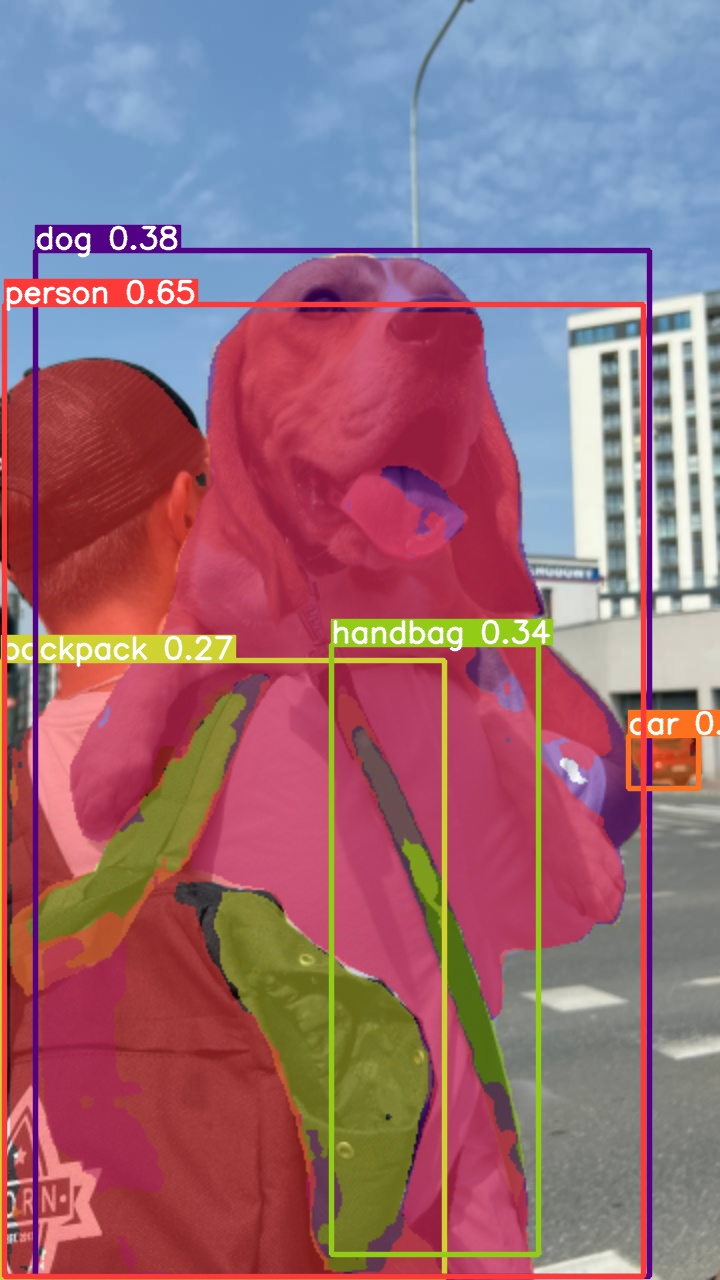

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 126.3ms
Speed: 0.6ms pre-process, 126.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_PATH = "/content/drive/MyDrive/Yolov8-seg"

In [ ]:
!pwd

/content


In [ ]:
%cd "/content/drive/MyDrive/Yolov8-seg"

/content/drive/MyDrive/Yolov8-seg


In [4]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 06CC-511F

 Directory of D:\Yolo-v8-backend\segmentation custom

10-12-2023  12:53    <DIR>          .
10-12-2023  11:53    <DIR>          ..
08-12-2023  19:13    <DIR>          data
10-12-2023  12:36               238 data.yaml
10-12-2023  12:53           106,055 dog.jpeg
10-12-2023  12:34               252 yolo.py
10-12-2023  12:35         7,054,355 yolov8n-seg.pt
10-12-2023  12:11        23,897,299 yolov8s-seg.pt
10-12-2023  12:53         2,161,662 yolov8_instance_segmentation_on_custom_dataset (1).ipynb
               6 File(s)     33,219,861 bytes
               3 Dir(s)  905,987,563,520 bytes free


## Custom Training

In [ ]:
# !yolo task=segment mode=train model=runs/segment/train2/weights/best.pt data=data.yaml epochs=90 imgsz=640 save=true

In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=1 imgsz=640 save=true

Ultralytics YOLOv8.0.225 ðŸš€ Python-3.11.3 torch-2.1.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)


train: Scanning D:\Yolo-v8-backend\segmentation custom\data\train\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]
train: Scanning D:\Yolo-v8-backend\segmentation custom\data\train\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]

val: Scanning D:\Yolo-v8-backend\segmentation custom\data\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]
val: Scanning D:\Yolo-v8-backend\segmentation custom\data\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]
        1/1         0G      1.685      3.229      4.248       1.49        130        640:   0%|          | 0/1 [00:11<?, ?it/s]
        1/1         0G      1.685      3.229      4.248       1.49        130        640: 100%|##########| 1/1 [00:12<00:00, 12.78s/it]
        1/1         0G      1.685      3.229      4.248       1.49        1


engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspac

In [ ]:
!ls runs/segment/train/

args.yaml					    results.csv       train_batch1.jpg	weights
events.out.tfevents.1702039934.a2cd1185b2a1.4106.0  train_batch0.jpg  train_batch2.jpg


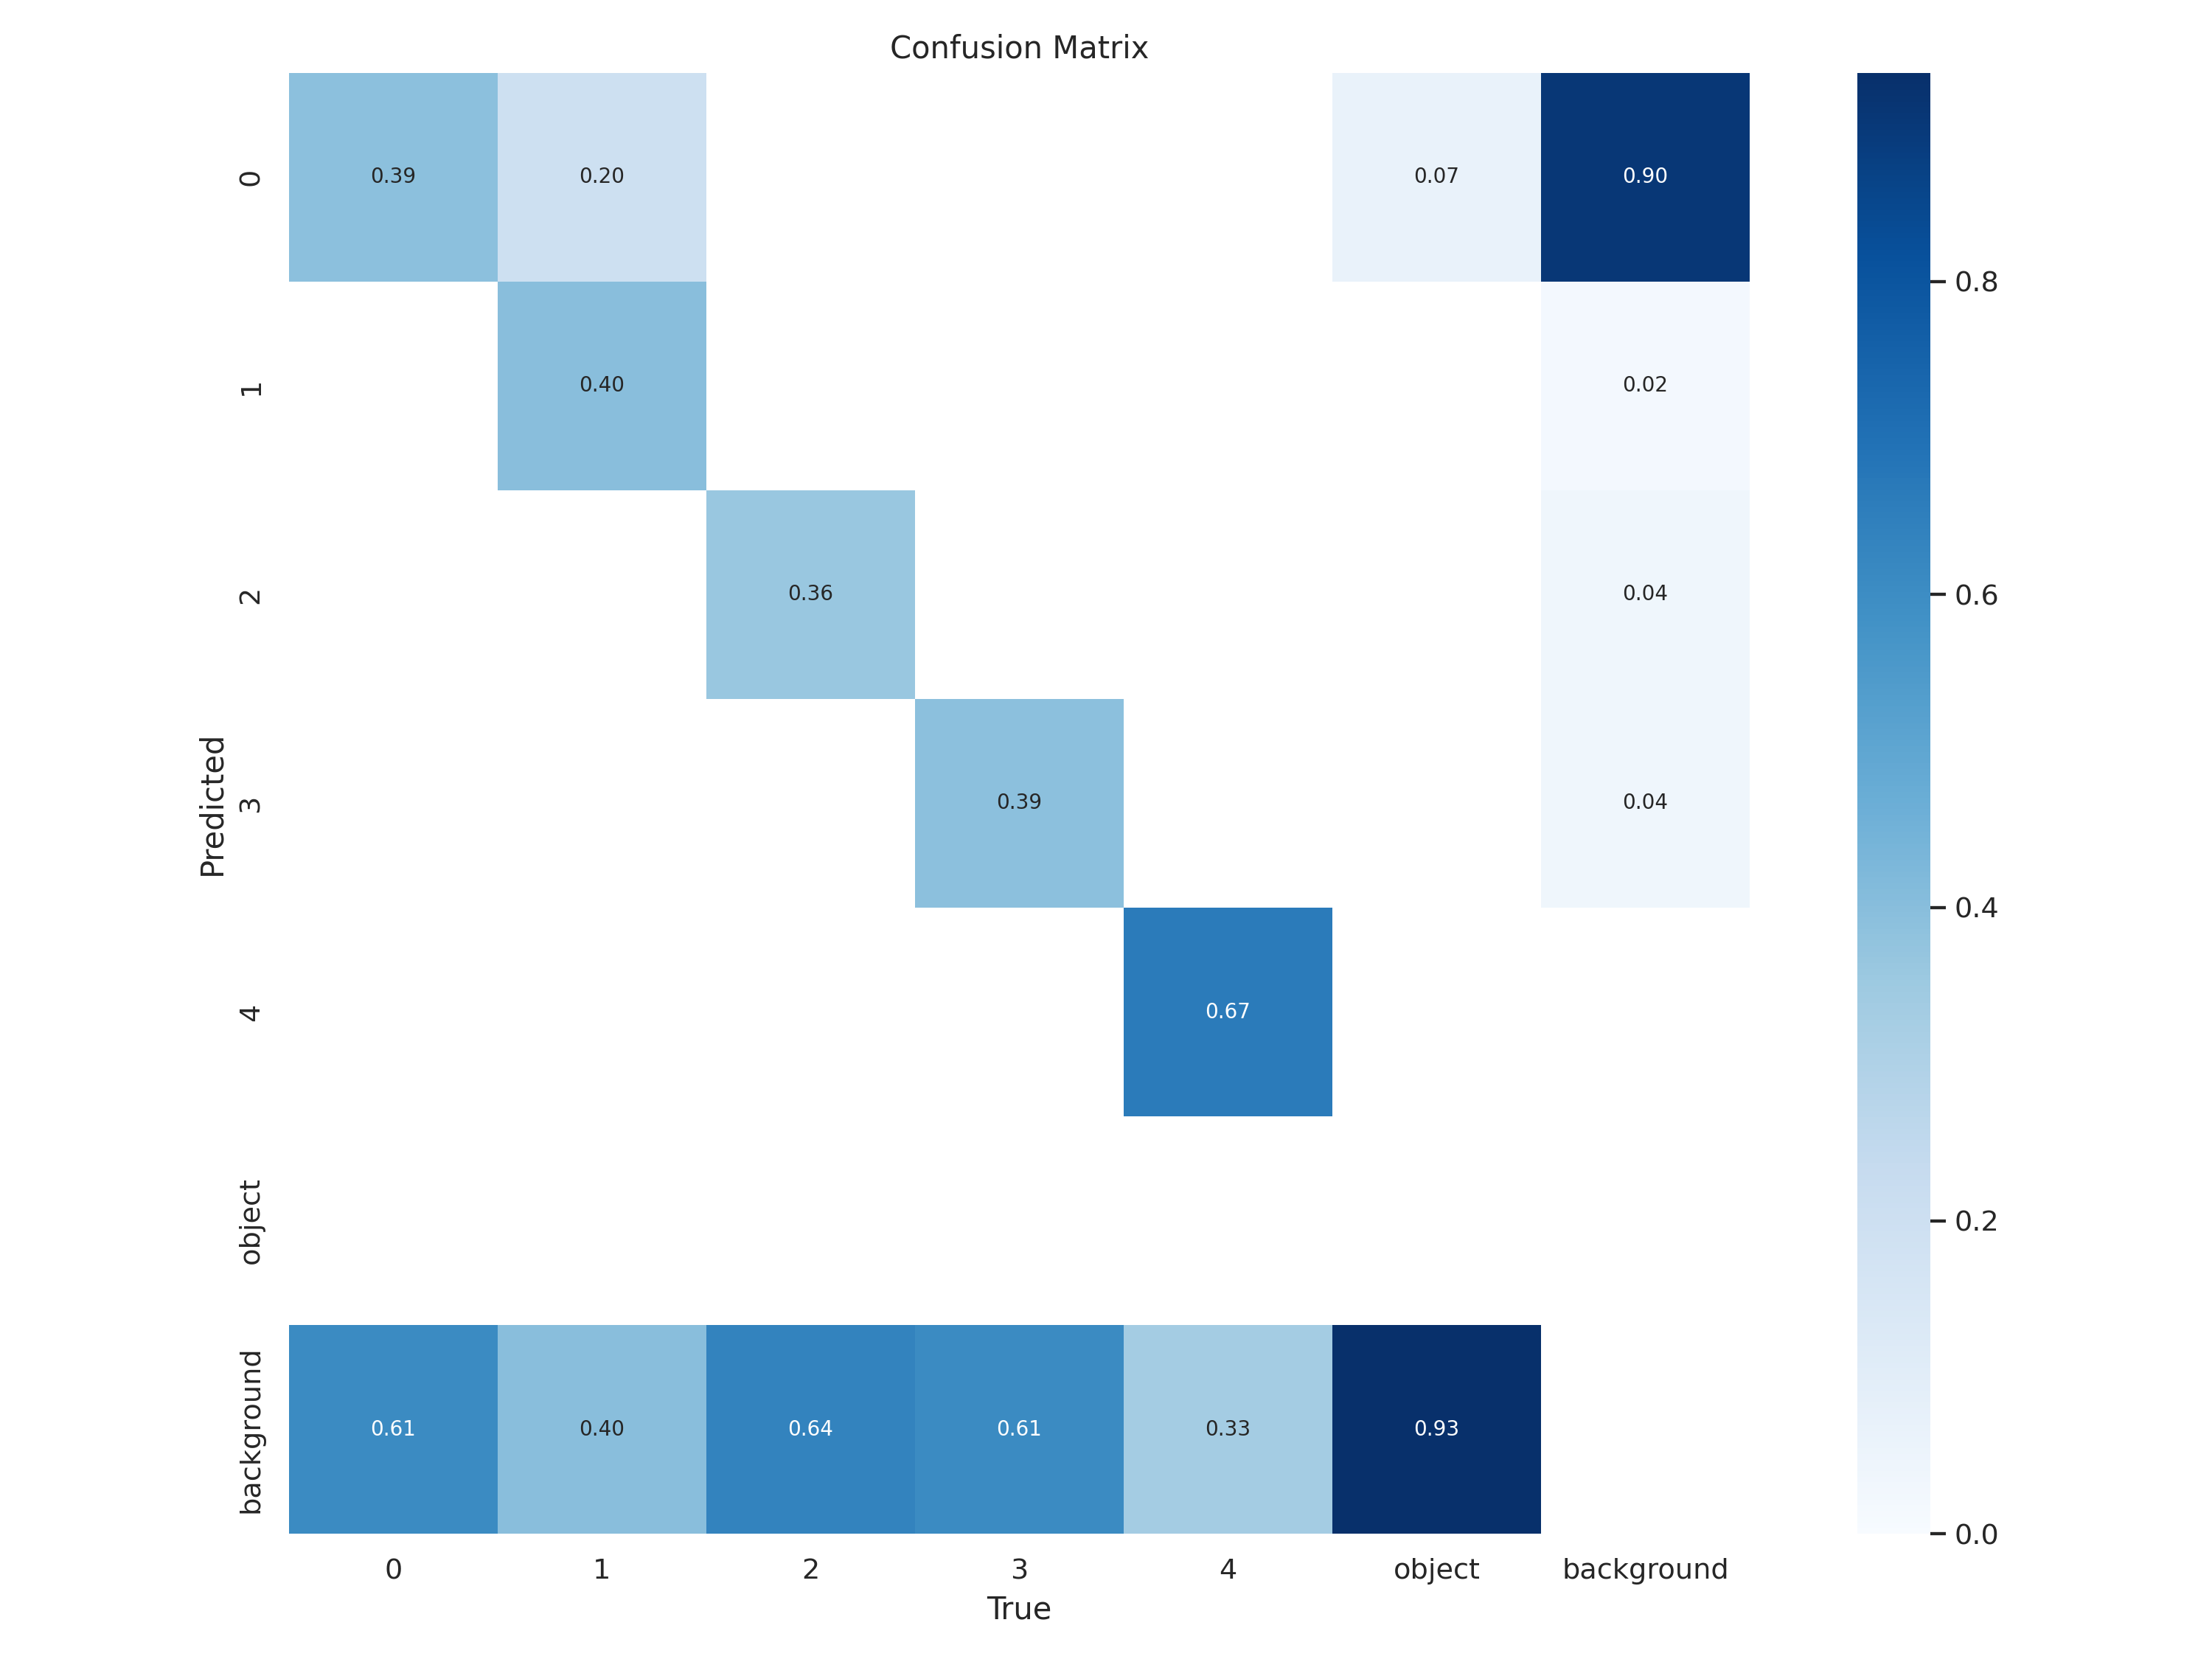

In [ ]:
Image(filename=f'runs/segment/train4/confusion_matrix.png', width=600)

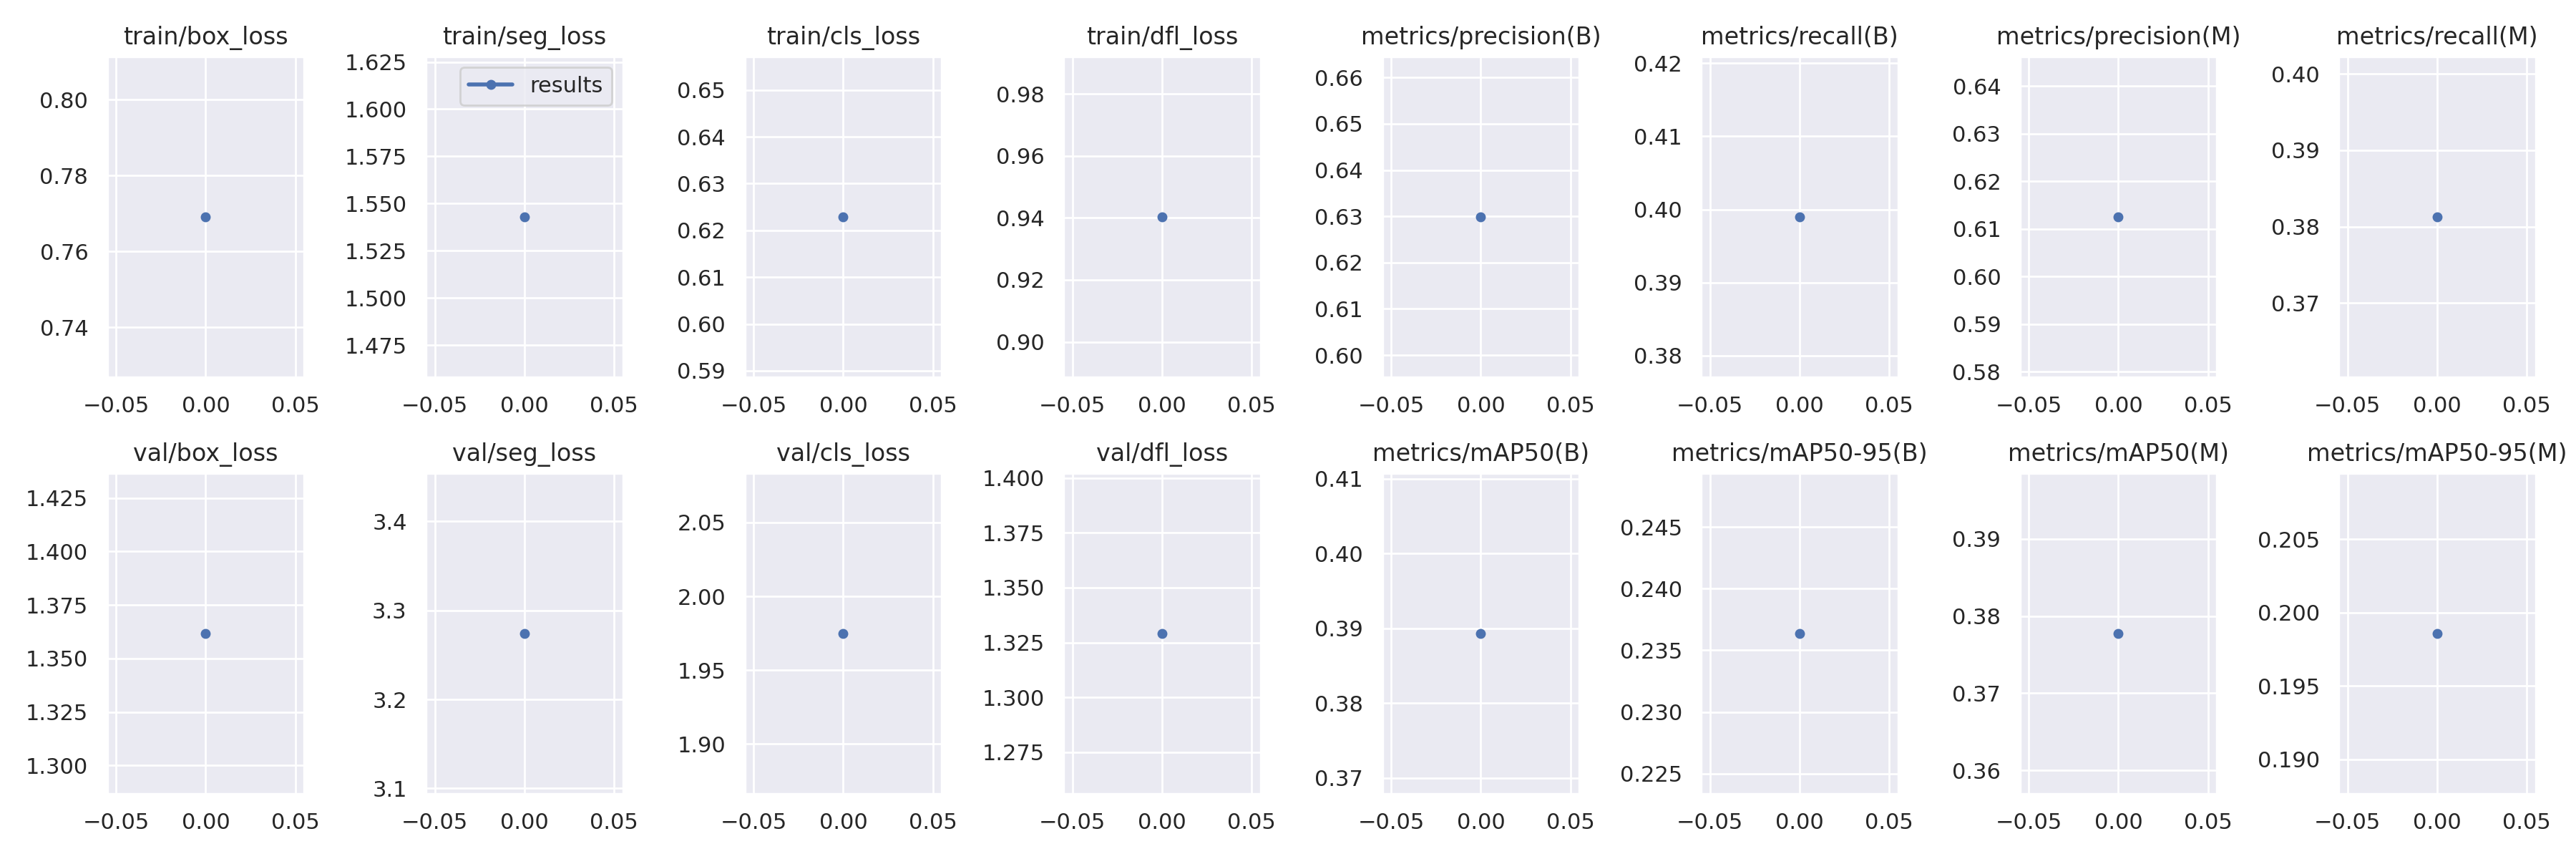

In [ ]:
Image(filename=f'runs/segment/train4/results.png', width=600)

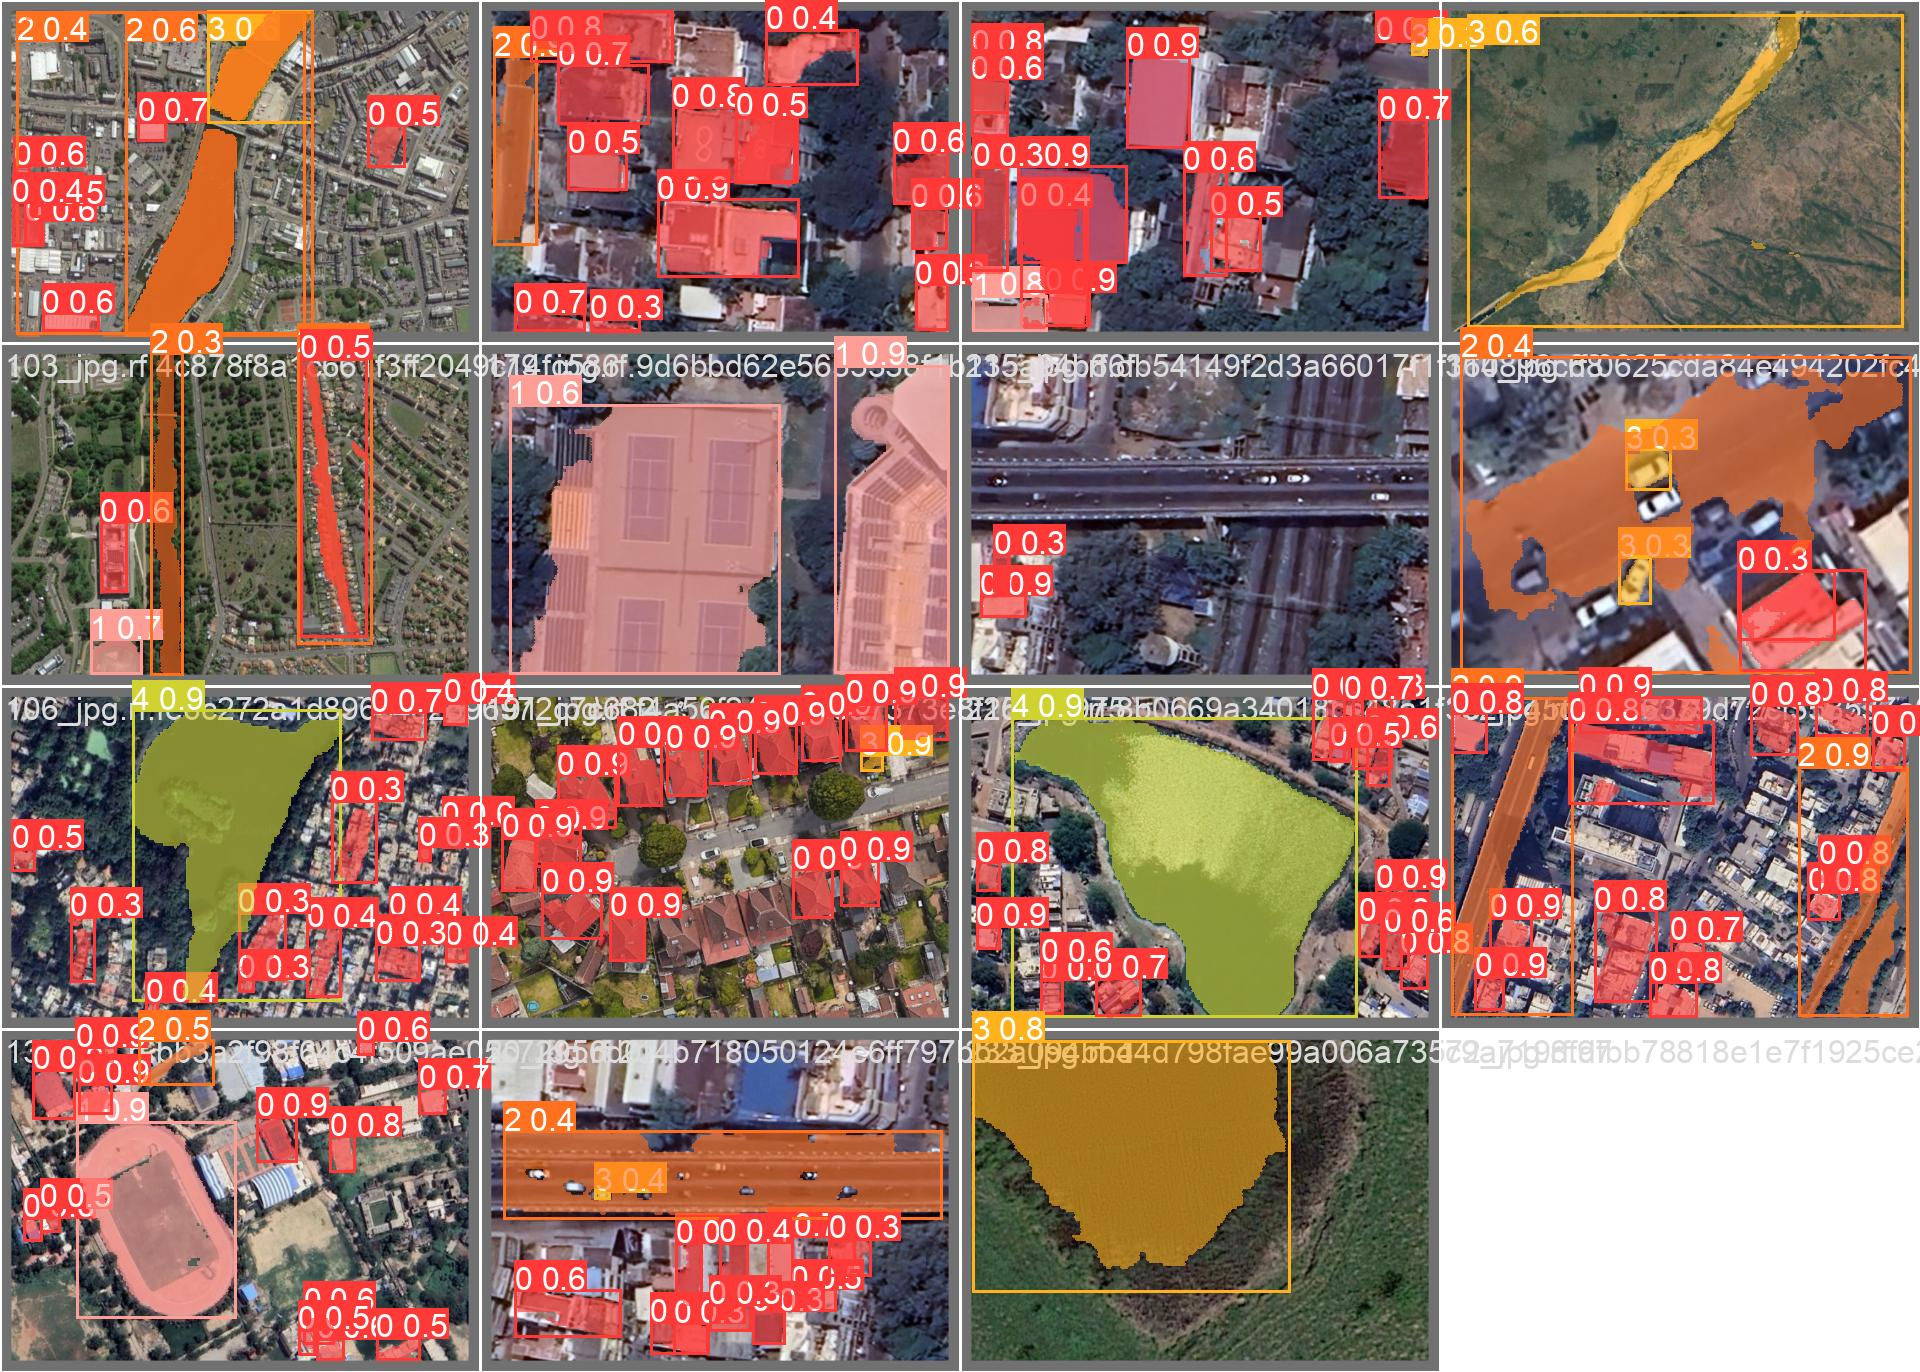

In [ ]:
Image(filename=f'runs/segment/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2023-12-08 14:47:58.615574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:47:58.615636: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:47:58.615673: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 14:47:59.854894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolov8-seg/data/valid/label

## Inference with Custom Model

In [ ]:
!pwd

/content/drive/MyDrive/Yolov8-seg


In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=data/test/images save=true

2023-12-08 14:49:53.931356: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:49:53.931407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:49:53.931446: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 14:49:54.979122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

image 1/35 /content/drive/MyDrive/Yolov8-seg/data/test/images/1

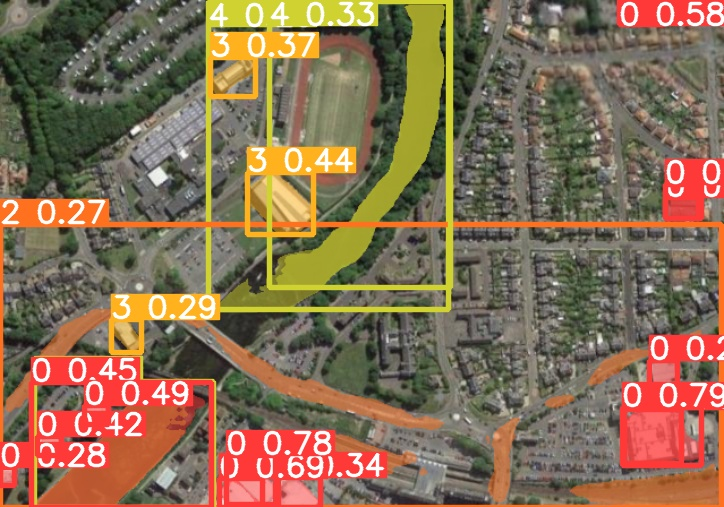

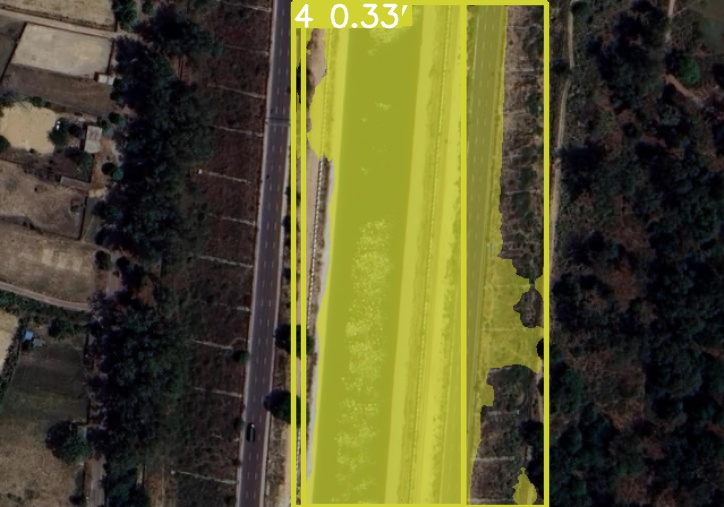

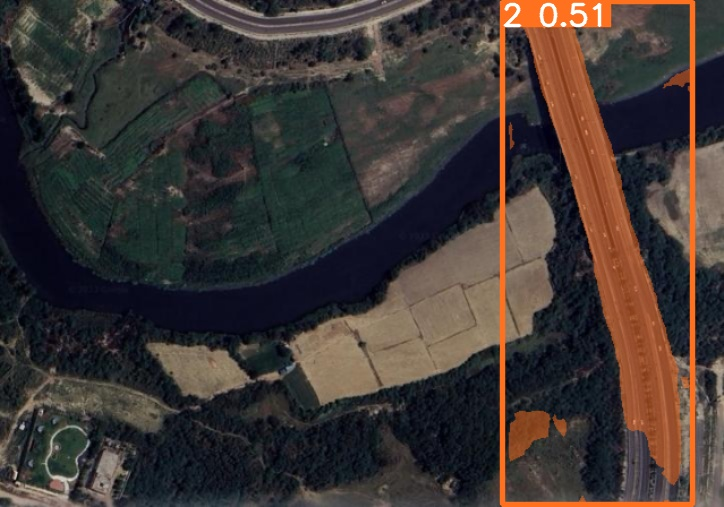

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 🏆 Congratulations


### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.



In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=data/train/images/100_jpg.rf.78971cb88008b3f4c6df83a88b219323.jpg save=true


2023-12-08 14:54:36.566254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:54:36.566317: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:54:36.566366: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 14:54:38.078508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/Yolov8-seg/data/train/images/1